In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
""" General settings """
hom_freezing_types     = [  "KoopMurray2016", "Spichtinger2023" ]
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

In [7]:
""" High output step reference simulations """
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 1.,
            "deposition_enable": False,
            "coalescence_enable": False,
            "n_output": 1,
            "dz": 0.2 * si.meter,
            }
KoopMurray2016_reference_high_w_simulation_no_coal = run_simulations(setting_dict)

setting_dict["coalescence_enable"] = True
KoopMurray2016_reference_high_w_simulation_coal = run_simulations(setting_dict)

setting_dict["coalescence_enable"] = True
KoopMurray2016_reference_high_w_simulation_coal_and_dep = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=4999999999.999999
0.2
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=4999999999.999999
0.2
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=4999999999.999999
0.2
Starting simulation...
all particles frozen or evaporated


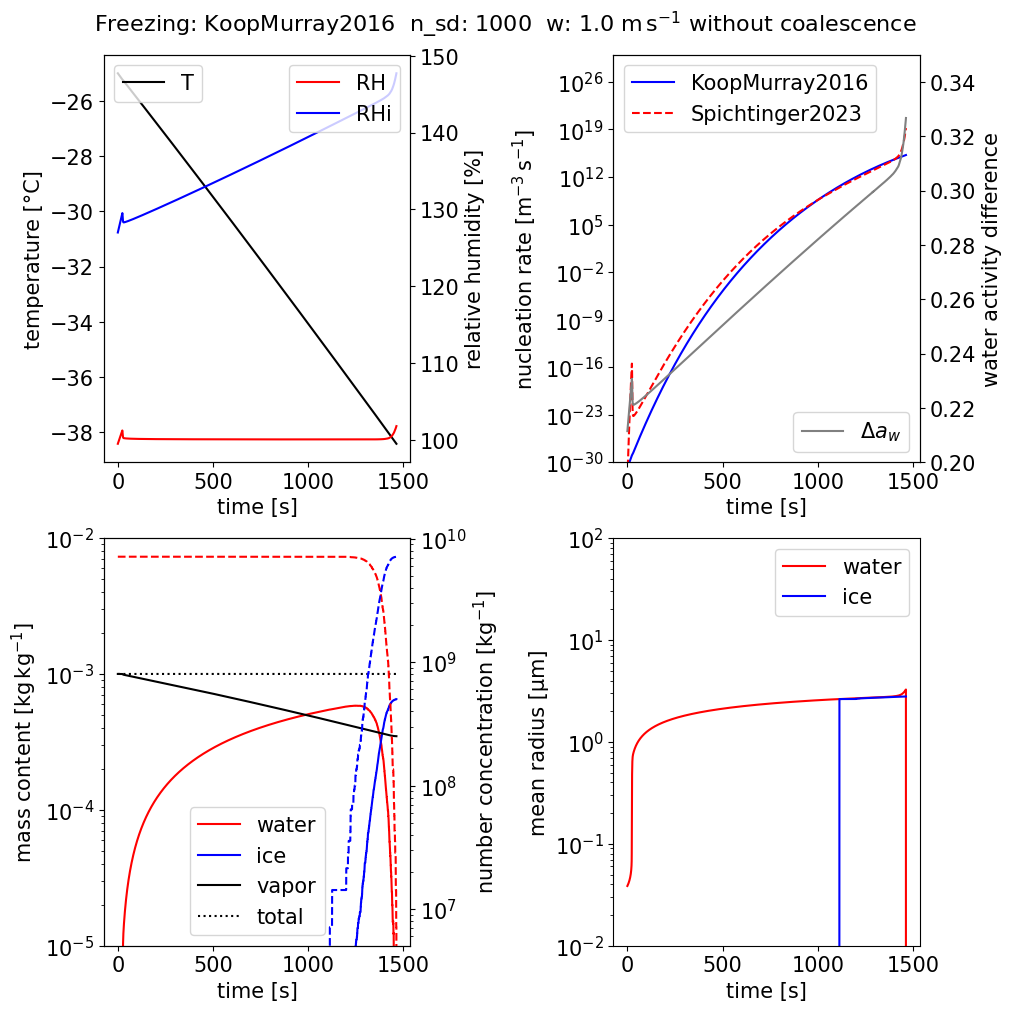

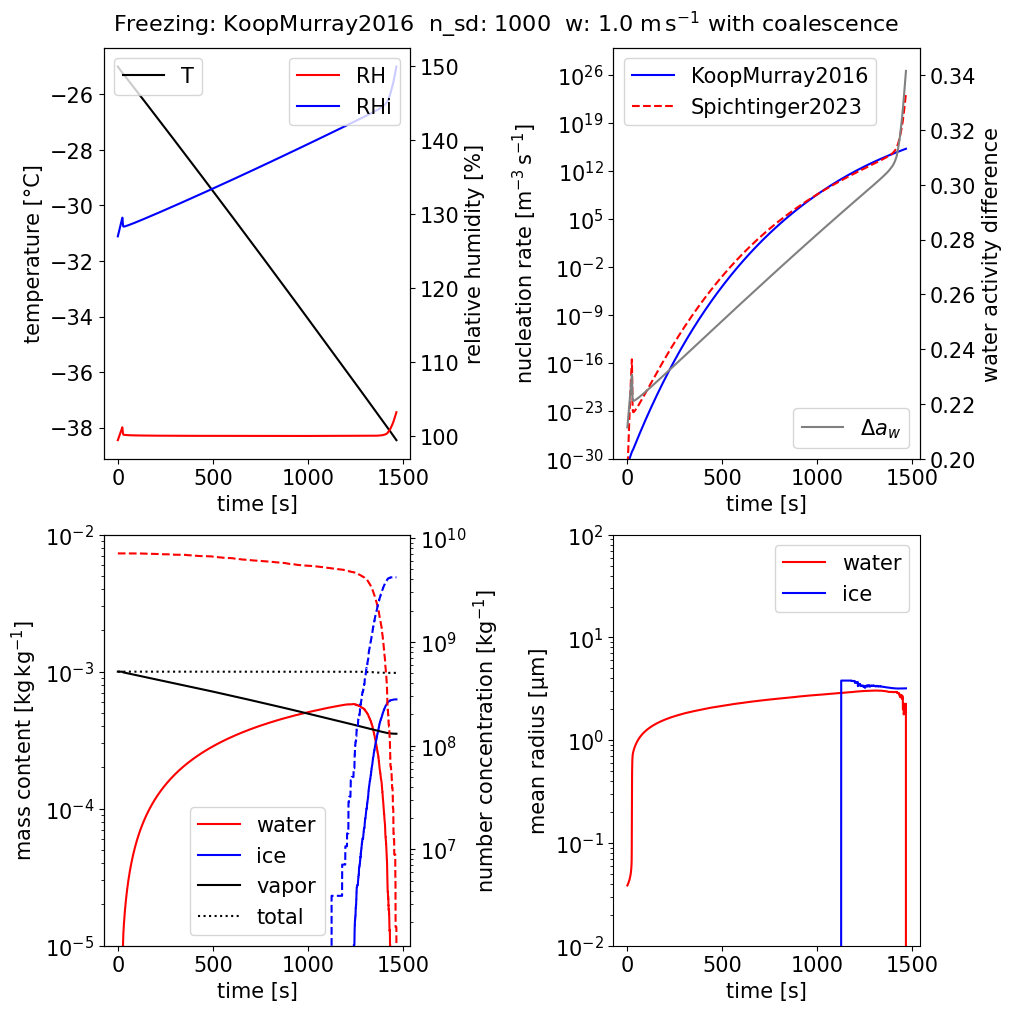

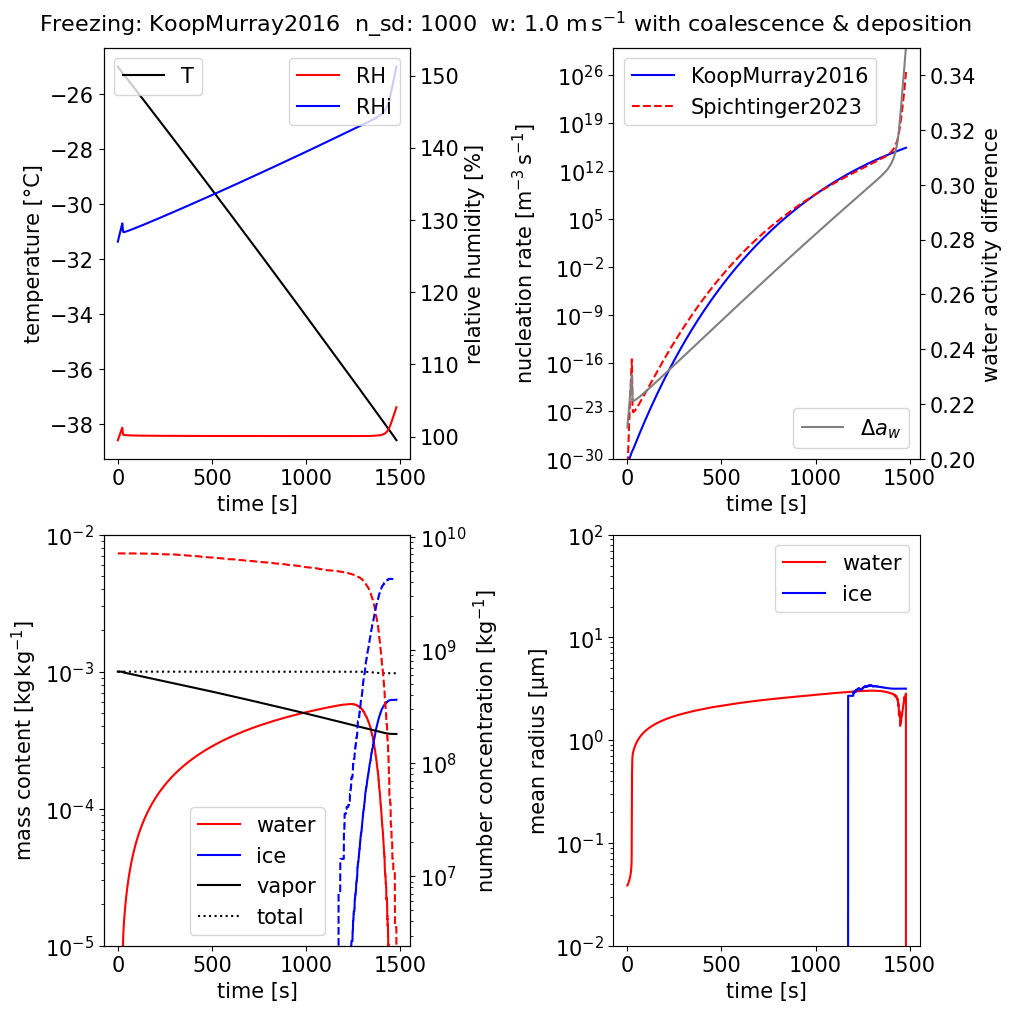

In [9]:
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_no_coal, " without coalescence", show_conc = True)
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_coal, " with coalescence", show_conc = True)
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_coal_and_dep, " with coalescence & deposition", show_conc = True)